For Q1 and Q2, you need to use IRIS dataset available at - https://archive.ics.uci.edu/ml/datasets/iris

Q1. Implement two perceptron model to perform classification on iris database from scratch. You should not be using any inbuilt function for this implementation (except reading the data). 
(a) vary the learning rate and show the best learning rate value when your run it for 50 epochs. 
(b) vary the number of epochs from 10 to 100 in a step of 10 and show the loss value curve (using the best learning rate obtained from (a))

Q2. Implement a 3-class backpropagation NNet on your own to classify iris data, i.e. from scratch. You should not be using any inbuilt function for this implementation (except reading the data). 
(a) vary the learning rate and show the best learning rate value when your run it for 50 epochs. 
(b) vary the number of epochs from 10 to 100 in a step of 10 and show the loss value curve (using the best learning rate obtained from (a))
(c) add L2 regularization - show the comparisons with and without this regularization and analyze your results. 

Q3. Use any toolbox in python and implement RBF NNet to solve one of the problems/databases (of your choice from the UCI ML database Repo). Analyze your results with respect to varying learning rate and epochs. You are not allowed to use someone's code available online. UCI databases: https://archive.ics.uci.edu/ml/datasets.php

Q4. Using MNIST database, code Autoencoder model with three encoding and three decoding layers. Show the visualization of the feature maps. On the features, add a classifier to perform 10-class classification and show the training loss curve and test accuracy

#3  Use any toolbox in python and implement RBF NNet to solve one of the problems/databases (of your choice from the UCI ML database Repo). Analyze your results with respect to varying learning rate and epochs. You are not allowed to use someone's code available online. UCI databases: https://archive.ics.uci.edu/ml/datasets.php

Using MNIST problem.

Code used for reference for correct coding practice: https://github.com/csnstat/rbfn/blob/master/RBFN_MNIST.ipynb

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_mnist = datasets.MNIST(root='https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld',
                          train=True,
                          transform=torchvision.transforms.ToTensor(),
                          download=True)    #load train data

test_mnist = datasets.MNIST(root='https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld',
                         train=False,
                         transform=torchvision.transforms.ToTensor(),
                         download=True)     #load test data

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld/MNIST/raw/train-images-idx3-ubyte.gz to https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld/MNIST/raw/train-labels-idx1-ubyte.gz to https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld/MNIST/raw/t10k-images-idx3-ubyte.gz to https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld/MNIST/raw/t10k-labels-idx1-ubyte.gz to https://archive.ics.uci.edu/ml/machine-learning-databases/mnist-mld/MNIST/raw



torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


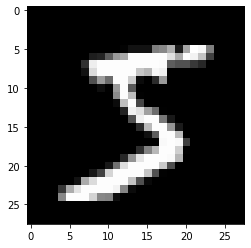

In [ ]:
print(train_mnist.train_data.size())  # (60000, 28, 28)
print(train_mnist.train_labels.size())  # (60000)
print(test_mnist.test_data.size())  #(10000, 28, 28)
print(test_mnist.test_labels.size())    #(10000)

plt.imshow(train_mnist.train_data[0,:,:].numpy(), cmap='gray')

In [ ]:
batch_size = 2000
data_loader = torch.utils.data.DataLoader(dataset=train_mnist,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)    #iterable on train data

In [ ]:
images_batch, labels_batch = next(iter(data_loader))    

print(images_batch.size())
print(labels_batch.size())

torch.Size([2000, 1, 28, 28])
torch.Size([2000])


In [ ]:
device = device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")    #assign gpu device name

In [ ]:
class Rbf(nn.Module):
    def __init__(self, centers, num_classes=10):
        super(Rbf, self).__init__()
        self.centers = nn.Parameter(centers)        #means of Gaussian
        self.num_centers = centers.size(0)
        self.num_classes = num_classes
    
        self.linear = torch.nn.Linear(self.num_centers, self.num_classes, bias=True)    #Linear layer
        self.sigmas = nn.Parameter(torch.ones(1,self.num_centers)/4)    #sigmas of Gaussian

    def radial_function(self, batches):
        n_input = batches.size(0) # number of inputs
        Mu = self.centers.view(self.num_centers,-1).repeat(n_input,1,1) #reshape Mu 
        X = batches.view(n_input,-1).unsqueeze(1).repeat(1,self.num_centers,1)  #reshape X
        Phi = torch.exp(-self.sigmas.mul((X-Mu).pow(2).sum(2,keepdim=False)))   #using gaussian radial function as discussed in lecture
        return Phi
    
    def forward(self, batches): #forward pass
        Phi = self.radial_function(batches) #radial layer
        fx = self.linear(Phi)   #linear layer
        return fx

centers = images_batch.view(-1, 28*28)  #initialize centers to some examples
#centers = torch.rand(1000,28*28)
model = Rbf(centers.to(device), num_classes=10) #model initialized
model.to(device)    #send to GPU

Rbf(
  (linear): Linear(in_features=2000, out_features=10, bias=True)
)

In [ ]:
#initializations for benchmarking
train_loss = [None]*20  
test_performance = [None]*20
lr_list = []


for itr in range(50, 1001, 50):
    
    learning_rate = 0.00001 * itr
    lr_list.append(learning_rate)
    training_epochs = 2

    #loss function
    loss_function = torch.nn.CrossEntropyLoss()     #using CrossEntropyLoss   
    
    # Adam Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  #using Adam Optimizer
    

    batch_size = 150
    # dataset loader
    data_loader = torch.utils.data.DataLoader(dataset=train_mnist,
                                            batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=4)  #iterator on training data
    images_batch, labels_batch = next(iter(data_loader))

    model(images_batch.requires_grad_(False).to(device))    #drop gradient requirements 

    # Model Training
    for epoch in range(training_epochs):
        avg_loss = 0
        num_batches = len(train_mnist) // batch_size    

        for i, (images_batch, labels_batch) in enumerate(data_loader):        
            X = images_batch.view(-1, 28 * 28).to(device)
            Y = labels_batch.to(device)        
            optimizer.zero_grad()             #Nullify gradients
            Y_prediction = model(X)           # Forward Pass
            loss = loss_function(Y_prediction, Y) #compute cost
            loss.backward()                   #compute gradient
            optimizer.step()                  #gradient update

            avg_loss += loss / num_batches  #average loss per epoch

        print(f"Iteration Number: {itr//50} Epoch: {epoch+1} training loss = {avg_loss.data}")
        train_loss[itr//50 - 1] = avg_loss

    print('Training over!')
    # Test the Model
    correct = 0
    total = 0
    for images, labels in test_mnist:
        images = images.view(-1, 28*28).to(device)
        outputs = model(images) #check on test data
        _, predicted = torch.max(outputs.data, 1)   #select max value from predictions
        total += 1
        correct += (predicted == labels).sum()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images for learning rate {learning_rate}: {accuracy:.2f}%')
    test_performance[itr//50 - 1] = accuracy

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Iteration Number: 1 Epoch: 1 training loss = 0.23393172025680542
Iteration Number: 1 Epoch: 2 training loss = 0.2223730981349945
Training over!
Accuracy of the network on the 10000 test images for learning rate 0.0005: 93.83%
Iteration Number: 2 Epoch: 1 training loss = 0.2191024273633957
Iteration Number: 2 Epoch: 2 training loss = 0.2061999887228012
Training over!
Accuracy of the network on the 10000 test images for learning rate 0.001: 94.59%
Iteration Number: 3 Epoch: 1 training loss = 0.20102810859680176
Iteration Number: 3 Epoch: 2 training loss = 0.1873359978199005
Training over!
Accuracy of the network on the 10000 test images for learning rate 0.0015: 94.87%
Iteration Number: 4 Epoch: 1 training loss = 0.18931622803211212
Iteration Number: 4 Epoch: 2 training loss = 0.17187117040157318
Training over!
Accuracy of the network on the 10000 test images for learning rate 0.002: 95.15%
Iteration Number: 5 Epoch: 1 training loss = 0.16828466951847076
Iteration Number: 5 Epoch: 2 trai

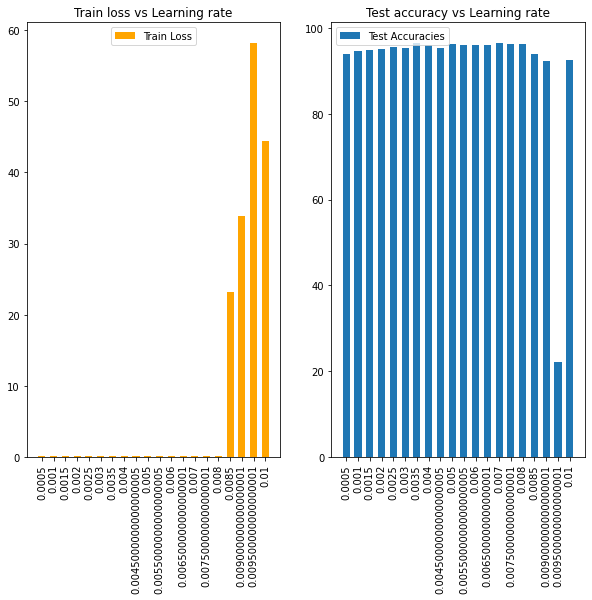

In [ ]:
f, a = plt.subplots(1, 2, sharex=True, figsize = (10, 8))
# plt.xticks()
a[0].bar(lr_list, [x.data.item() for x in train_loss], width = 0.0003, label='Train Loss', color = 'orange')
a[1].bar(lr_list, [x.data.item() for x in test_performance], width = 0.0003, label='Test Accuracies')
a[0].set_xticklabels(lr_list, rotation = 'vertical')
a[0].set_xticks(lr_list)
a[1].set_xticklabels(lr_list, rotation = 'vertical')

a[0].title.set_text('Train loss vs Learning rate')
a[1].title.set_text('Test accuracy vs Learning rate')
a[0].legend(loc='upper center')
a[1].legend()
plt.show()

In [ ]:
train_loss = [None]*10
test_performance = [None]*10
epoch_list = []
for training_epochs in range(5, 50, 5):
    epoch_list.append(training_epochs)
    learning_rate = 0.0075

    #loss function
    loss_function = torch.nn.CrossEntropyLoss()     #using CrossEntropyLoss   

    # Adam Optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    batch_size = 150
    # dataset loader
    data_loader = torch.utils.data.DataLoader(dataset=train_mnist,
                                            batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=4)
    images_batch, labels_batch = next(iter(data_loader))

    model(images_batch.requires_grad_(False).to(device))

    # Model Training
    for epoch in range(training_epochs):
        avg_loss = 0
        num_batches = len(train_mnist) // batch_size

        for i, (images_batch, labels_batch) in enumerate(data_loader):        
            X = images_batch.view(-1, 28 * 28).to(device)
            Y = labels_batch.to(device)        
            optimizer.zero_grad()             
            Y_prediction = model(X)           # Forward Pass
            loss = loss_function(Y_prediction, Y) #compute cost
            loss.backward()                   #compute gradient
            optimizer.step()                  #gradient update

            avg_loss += loss / num_batches

        print(f"Iteration Number: {training_epochs // 5} Epoch: {epoch+1} training loss = {avg_loss.data:.4f}")
        train_loss[training_epochs//5 - 1] = avg_loss

    print('Training over!')
    # Test the Model
    correct = 0
    total = 0
    for images, labels in test_mnist:
        images = images.view(-1, 28*28).to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += 1
        correct += (predicted == labels).sum()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images for learning rate {learning_rate}: {accuracy:.2f}%')
    test_performance[training_epochs//5 - 1] = accuracy

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Iteration Number: 1 Epoch: 1 training loss = 0.4691
Iteration Number: 1 Epoch: 2 training loss = 0.2628
Iteration Number: 1 Epoch: 3 training loss = 0.2008
Iteration Number: 1 Epoch: 4 training loss = 0.1897
Iteration Number: 1 Epoch: 5 training loss = 0.1788
Training over!
Accuracy of the network on the 10000 test images for learning rate 0.0075: 95.08%
Iteration Number: 2 Epoch: 1 training loss = 0.2986
Iteration Number: 2 Epoch: 2 training loss = 0.1709
Iteration Number: 2 Epoch: 3 training loss = 0.1604
Iteration Number: 2 Epoch: 4 training loss = 0.1417
Iteration Number: 2 Epoch: 5 training loss = 0.1410
Iteration Number: 2 Epoch: 6 training loss = 0.1461
Iteration Number: 2 Epoch: 7 training loss = 0.1380
Iteration Number: 2 Epoch: 8 training loss = 0.1370
Iteration Number: 2 Epoch: 9 training loss = 0.1488
Iteration Number: 2 Epoch: 10 training loss = 0.1451
Training over!
Accuracy of the network on the 10000 test images for learning rate 0.0075: 93.59%
Iteration Number: 3 Epoch

In [ ]:
f, a = plt.subplots(1, 2, sharex=True, figsize = (10, 10))
bar0 = [x.data.item() for x in train_loss[:9]]
bar1 = [x.data.item() for x in test_performance[:9]]
a[0].bar(epoch_list, bar0, label='Train Loss', color = 'orange')
a[1].bar(epoch_list, bar1, label='Test Accuracies')
# a[0][i].set_xticks(())
# a[0][i].set_yticks(())
#finding c corresponding to max value
ymax0 = max(bar0)
xpos0 = bar0.index(ymax0)
xmax0 = epoch_list[xpos0]

ymax1 = max(bar1)
xpos1 = bar1.index(ymax1)
xmax1 = epoch_list[xpos1]

a[0].title.set_text('Average train loss vs Number of Epochs')
plt.annotate(f'max (epoch = {epoch_list[xpos1]})', (xmax1,ymax1), (xmax1+3, ymax1+3), arrowprops=dict(facecolor='orange'), fontvariant='small-caps', fontweight='bold', color='orange')
a[1].title.set_text('Test accuracy vs Number of Epochs')
plt.xticks(epoch_list)
plt.show()